In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import Emma image
emma = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
assert emma is not None

(256,)


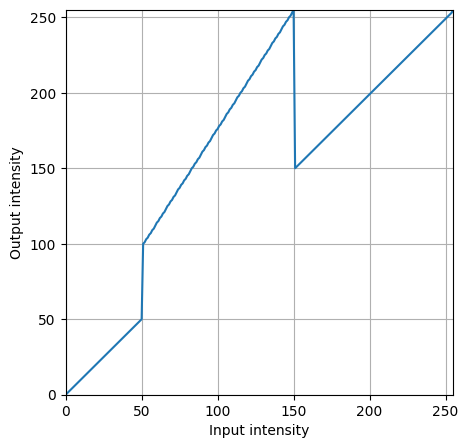

In [34]:
t1 = np.linspace(0, 50, num=51).astype('uint8')
t2 = np.linspace(100, 255, num=100).astype('uint8')
t3 = np.linspace(150, 255, num=105).astype('uint8')

# Concatenate all segments to create the transformation array
t = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()


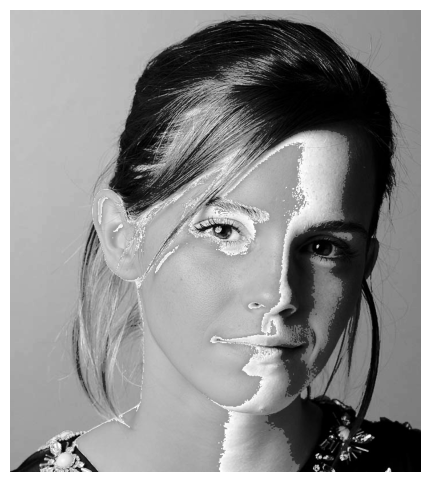

In [35]:
g = t[emma]

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [98]:
# Import Emma image
brain = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert brain is not None

(256,)


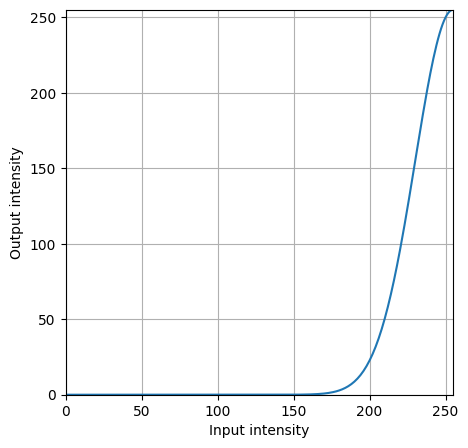

In [99]:
mu = 255
sigma = 25
x = np.linspace(0, 255, 256)
t = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Ensure the output is in the valid range for image intensities [0, 255]
t = np.clip(t, 0, 255)

print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

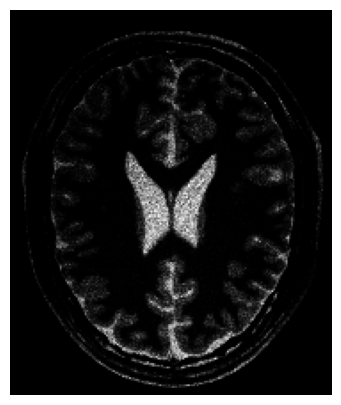

In [100]:
g = t[brain]

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

(256,)


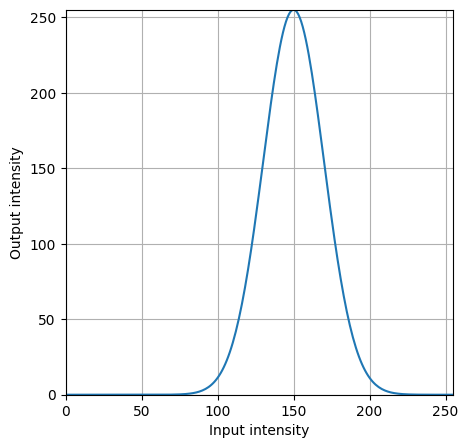

In [101]:
mu = 150
sigma = 20
x = np.linspace(0, 255, 256)
t = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Ensure the output is in the valid range for image intensities [0, 255]
t = np.clip(t, 0, 255)

print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

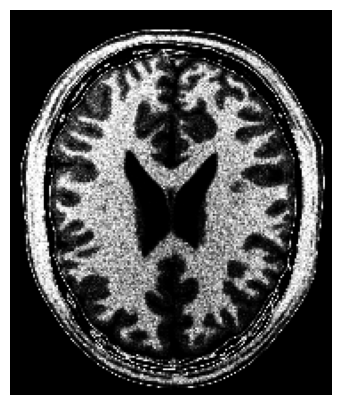

In [102]:
g = t[brain]

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [117]:
# Import Emma image
imq3_bgr = cv.imread('a1images/highlights_and_shadows.jpg')
assert imq3_bgr is not None
imq3_lab = cv.cvtColor(imq3_bgr, cv.COLOR_BGR2LAB)
imq3_rgb = cv.cvtColor(imq3_bgr, cv.COLOR_BGR2RGB)

In [124]:
L,a,b = cv.split(imq3_lab)

gamma = 0.7
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0, 256)]).astype('uint8')
L_modified = cv.LUT(L, t)

merged = cv.merge([L_modified, a, b])
imq3_modified = cv.cvtColor(merged, cv.COLOR_LAB2RGB)


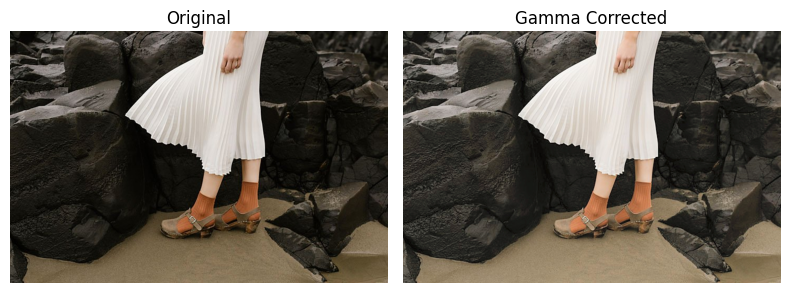

In [125]:
# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

# Plot the first image
axs[0].imshow(imq3_rgb)
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(imq3_modified)
axs[1].set_title('Gamma Corrected')
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()

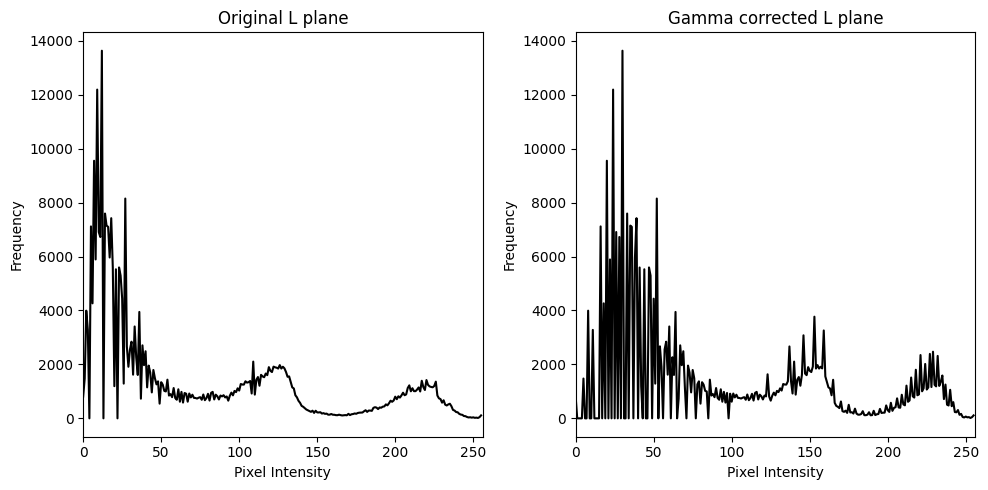

In [129]:
# Compute the histograms for both images
hist1 = cv.calcHist([L], [0], None, [256], [0, 256])
hist2 = cv.calcHist([L_modified], [0], None, [256], [0, 256])

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# First subplot: Histogram of the first image
plt.subplot(1, 2, 1)
plt.plot(hist1, color='black')
plt.title('Original L plane')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Second subplot: Histogram of the second image
plt.subplot(1, 2, 2)
plt.plot(hist2, color='black')
plt.title('Gamma corrected L plane')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Display the plots side by side
plt.tight_layout()  # Adjusts the spacing between subplots for a neat layout
plt.show()

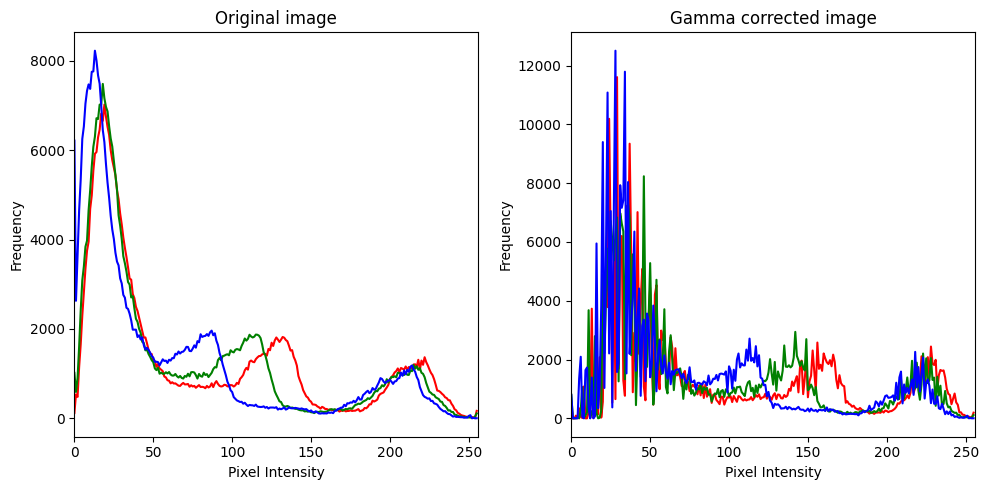

In [132]:
color = ('r', 'g', 'b')  # Color channels

plt.figure(figsize=(10, 5))

# First image's histograms
plt.subplot(1, 2, 1)
for i, col in enumerate(color):
    hist1 = cv.calcHist([imq3_rgb], [i], None, [256], [0, 256])
    plt.plot(hist1, color=col)
plt.title('Original image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Second image's histograms
plt.subplot(1, 2, 2)
for i, col in enumerate(color):
    hist2 = cv.calcHist([imq3_modified], [i], None, [256], [0, 256])
    plt.plot(hist2, color=col)
plt.title('Gamma corrected image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Display
plt.tight_layout()
plt.show()


## Question 4

In [134]:
# Import Emma image
spider = cv.imread('a1images/spider.png')
assert spider is not None
spider_hsv = cv.cvtColor(spider, cv.COLOR_BGR2HSV)
spider_rgb = cv.cvtColor(spider, cv.COLOR_BGR2RGB)

# Split into planes
H, S, V = cv.split(spider_hsv)

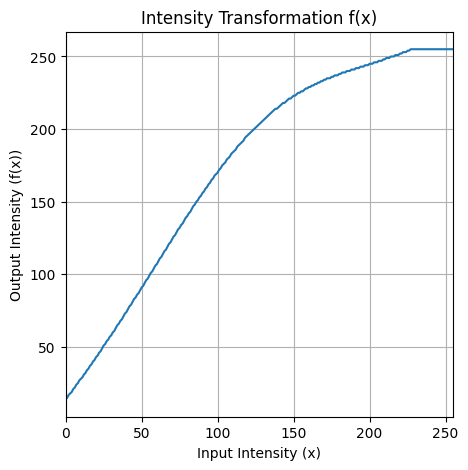

In [172]:
a = 0.6
sigma = 70.0 

x = np.arange(0, 256)
f = np.minimum(x + a * 128 * np.exp(-((x - 128)**2) / (2 * sigma**2)), 255).astype('uint8')

# Display the image
plt.figure(figsize=(5, 5))
plt.plot(x, f)
plt.title('Intensity Transformation f(x)')
plt.xlabel('Input Intensity (x)')
plt.ylabel('Output Intensity (f(x))')
plt.grid(True)
plt.xlim([0, 255])
plt.xlim([0, 255])
plt.show()

In [173]:
# Apply transformation to Saturation plane
S_modified = cv.LUT(S, f)

# Merge
merged = cv.merge([H, S_modified, V])
spider_modified = cv.cvtColor(merged, cv.COLOR_HSV2RGB)

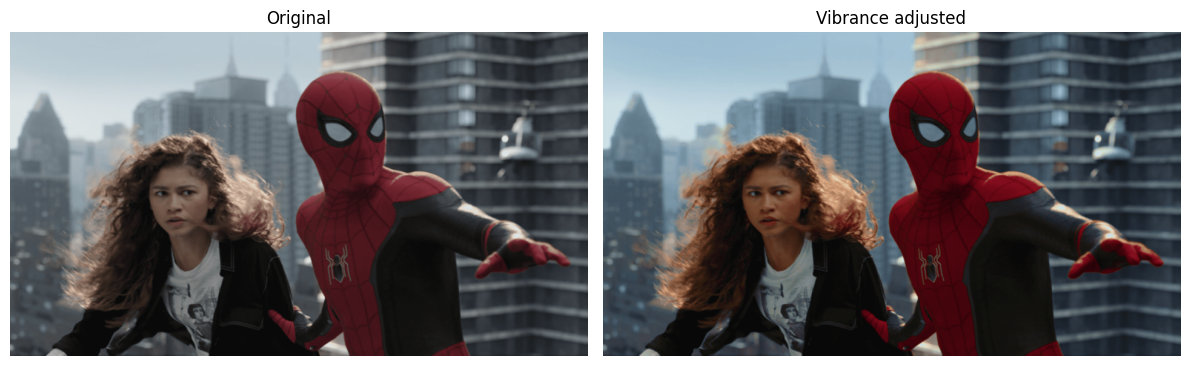

In [175]:
# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Plot the first image
axs[0].imshow(spider_rgb)
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(spider_modified)
axs[1].set_title('Vibrance adjusted')
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()

## Question 5

In [187]:
# Import Shells image
shells = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)
assert shells is not None

In [188]:
def histogram_equalization(f):
    # Get image details
    L = 256
    M, N = f.shape

    # Get histogram
    hist = cv.calcHist([f], [0], None, [L], [0, L])
    cdf = hist.cumsum()

    # Define transformation
    t = np.array([(L-1)/(M*N)*cdf[k] for k in range(256)]).astype("uint8")

    return t[f]


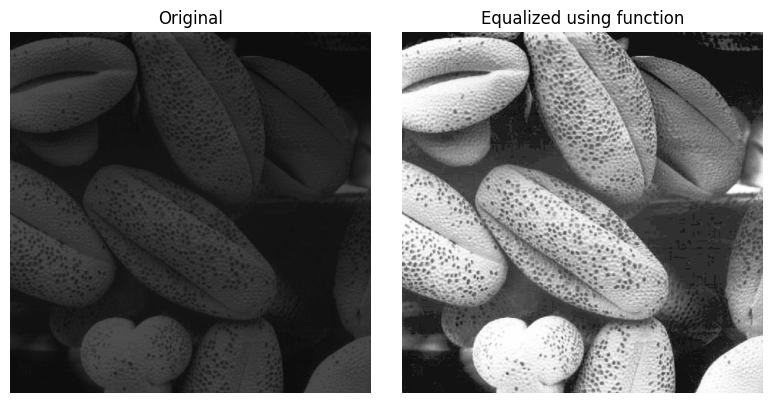

In [189]:
# Do histrogram equalization
equalized = histogram_equalization(shells)

# Create the figure for plotting
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(shells, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis("off")
ax[1].imshow(equalized, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Equalized using function')
ax[1].axis("off")

# Show the plot
plt.tight_layout()
plt.show()

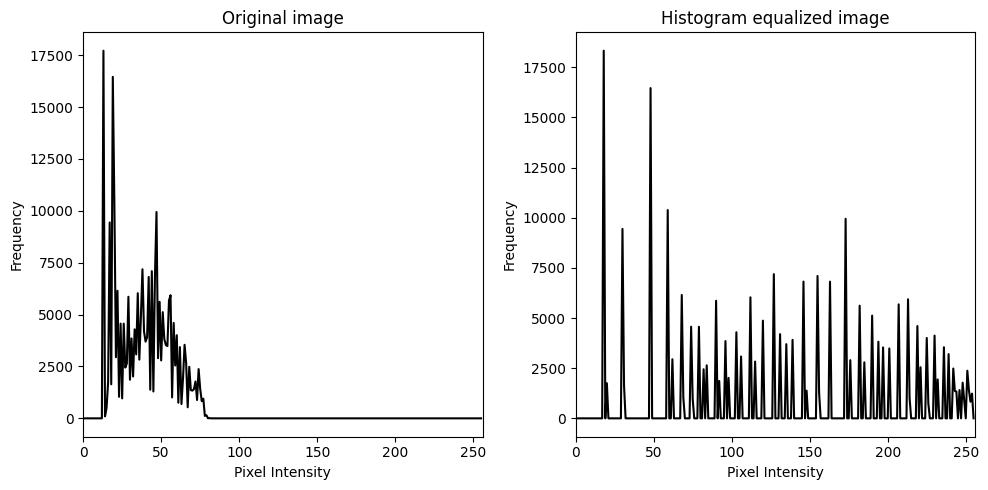

In [191]:
# Compute the histograms for both images
hist1 = cv.calcHist([shells], [0], None, [256], [0, 256])
hist2 = cv.calcHist([equalized], [0], None, [256], [0, 256])

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# First subplot: Histogram of the first image
plt.subplot(1, 2, 1)
plt.plot(hist1, color='black')
plt.title('Original image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Second subplot: Histogram of the second image
plt.subplot(1, 2, 2)
plt.plot(hist2, color='black')
plt.title('Histogram equalized image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Display the plots side by side
plt.tight_layout()  # Adjusts the spacing between subplots for a neat layout
plt.show()

## Question 6

In [196]:
# Import Jennifer image
jennifer = cv.imread('a1images/jeniffer.jpg')
assert jennifer is not None
jennifer_hsv = cv.cvtColor(jennifer, cv.COLOR_BGR2HSV)
jennifer_rgb = cv.cvtColor(jennifer, cv.COLOR_BGR2RGB)

# Split into planes
H, S, V = cv.split(jennifer_hsv)

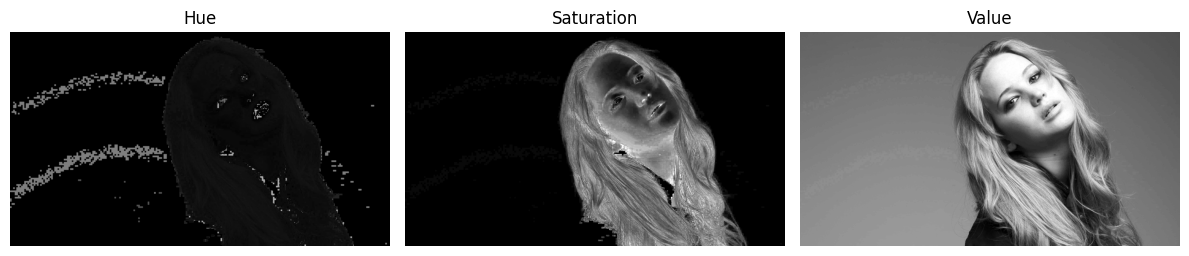

In [198]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

ax[0].imshow(H, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Hue')
ax[0].axis("off")
ax[1].imshow(S, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Saturation')
ax[1].axis("off")
ax[2].imshow(V, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Value')
ax[2].axis("off")

plt.tight_layout()
plt.show()

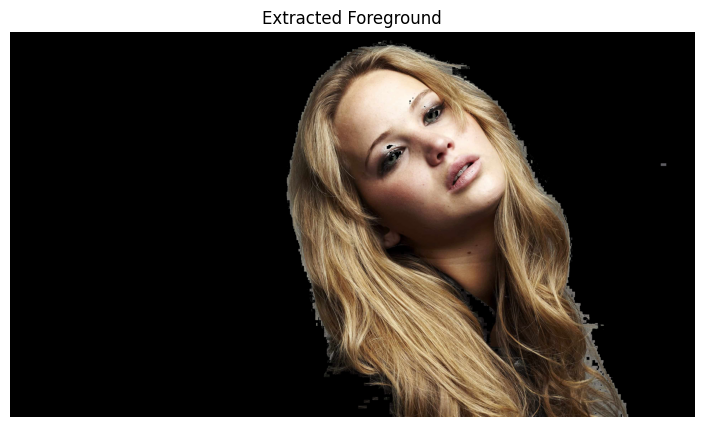

In [205]:
# Apply thresholding on Saturation plane
_, mask = cv.threshold(S, 12, 255, cv.THRESH_BINARY)

# Use bitwise_and to extract the foreground using the mask
foreground = cv.bitwise_and(jennifer, jennifer, mask=mask)

# Display the extracted foreground
plt.figure(figsize=(10, 5))

plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Extracted Foreground')
plt.axis('off')
plt.show()

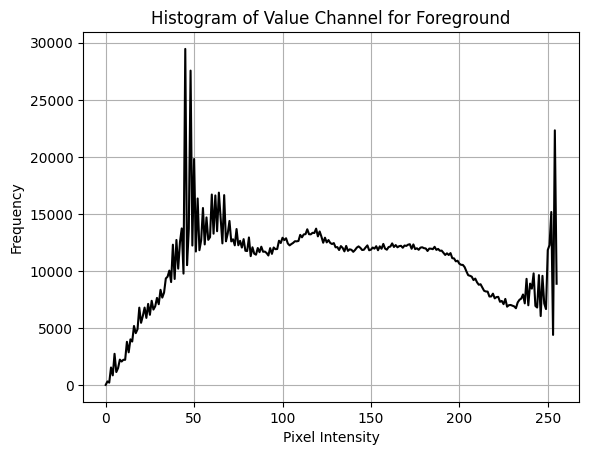

In [213]:
# Compute and plot the histogram of the Value (V) channel of the foreground
foreground_hsv = cv.cvtColor(foreground, cv.COLOR_BGR2HSV)
H_fg, S_fg, V_fg = cv.split(foreground_hsv)

# Calculate the histogram of the Value channel
hist = cv.calcHist([V_fg], [0], mask, [256], [0, 256])

# Plot the histogram
plt.figure()
plt.plot(hist, color='black')
plt.title('Histogram of Value Channel for Foreground')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

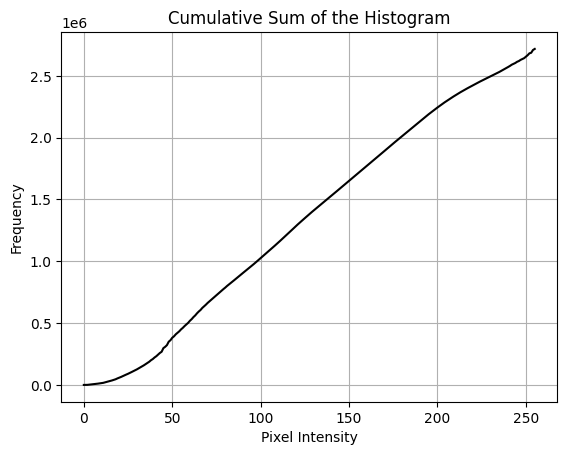

In [215]:
cdf = hist.cumsum()

# Plot the histogram
plt.figure()
plt.plot(cdf, color='black')
plt.title('Cumulative Sum of the Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

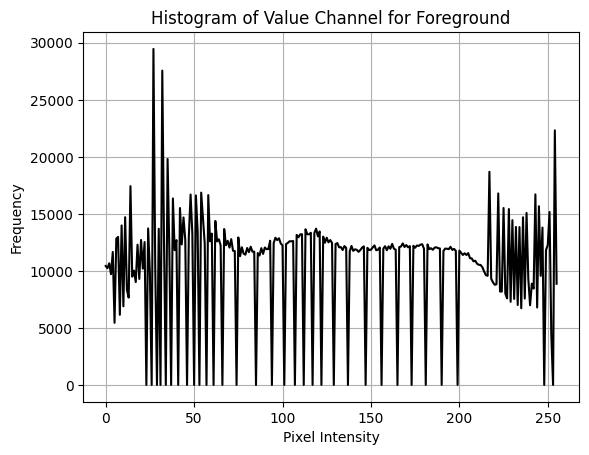

In [218]:
# Number of pixels
pixels = cdf[-1]

# Define transformation
t = np.array([(256-1)/(pixels)*cdf[k] for k in range(256)]).astype("uint8")

# Equalize
V_eq = t[V_fg]

# Calculate the histogram of the equalized Value channel
hist = cv.calcHist([V_eq], [0], mask, [256], [0, 256])

# Plot the histogram
plt.figure()
plt.plot(hist, color='black')
plt.title('Histogram of Value Channel for Foreground')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Question 7

In [6]:
# Import Einstein image
einstein = cv.imread('a1images/einstein.png', cv.IMREAD_GRAYSCALE)
assert einstein is not None

In [4]:
# Define the Sobel-X filter
sobel_x = np.array([[1, 0, -1], 
                    [2, 0, -2], 
                    [1, 0, -1]])

# Define the Sobel-Y filter
sobel_y = np.array([[1, 2, 1], 
                    [0, 0, 0], 
                    [-1, -2, -1]])

print("Sobel X filter:")
print(sobel_x)

print("\nSobel Y filter:")
print(sobel_y)

Sobel X filter:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]

Sobel Y filter:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [8]:
# Apply the Sobel filter in the X direction
sobel_x_filtered = cv.filter2D(einstein, -1, sobel_x)

# Apply the Sobel filter in the Y direction
sobel_y_filtered = cv.filter2D(einstein, -1, sobel_y)

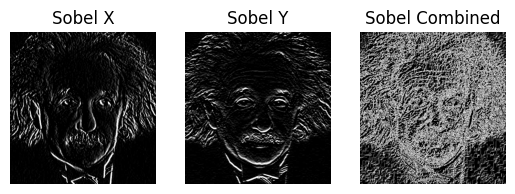

In [9]:
# Combine both X and Y directions to get the gradient magnitude
sobel_combined = np.sqrt(sobel_x_filtered**2 + sobel_y_filtered**2)
sobel_combined = np.uint8(sobel_combined)

# Display the results
plt.subplot(1, 3, 1), plt.imshow(sobel_x_filtered, cmap='gray')
plt.title('Sobel X'), plt.axis('off')

plt.subplot(1, 3, 2), plt.imshow(sobel_y_filtered, cmap='gray')
plt.title('Sobel Y'), plt.axis('off')

plt.subplot(1, 3, 3), plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Combined'), plt.axis('off')

plt.show()

## Question 8

In [23]:
def zoom(img, technique, scale=4):
    if technique == 'nn':
        return cv.resize(img, None, fx=scale, fy=scale, interpolation=cv.INTER_NEAREST)
    elif technique == 'bilinear':
        return cv.resize(img, None, fx=scale, fy=scale, interpolation=cv.INTER_LINEAR)

def norm_SSD(img1, img2):
    if img1.shape != img2.shape:
        raise ValueError("Images must have the same dimensions")
    return np.sum((img1 - img2)**2) / img1.size

### Question 3

In [40]:
# Import images
im1 = cv.imread('a1images/a1q5images/im01.png')
assert im1 is not None
im1_small = cv.imread('a1images/a1q5images/im01small.png')
assert im1_small is not None

In [41]:
im1_zoomed_nn = zoom(im1_small, technique='nn')
im1_zoomed_bilinear = zoom(im1_small, technique='bilinear')

nn_SSD = norm_SSD(im1, im1_zoomed_nn)
bilinear_SSD = norm_SSD(im1, im1_zoomed_bilinear)

print('Normalized SSD for Nearest Neighbour: ', nn_SSD)
print('Normalized SSD for Bilinear: ', bilinear_SSD)

Normalized SSD for Nearest Neighbour:  31.284316486625514
Normalized SSD for Bilinear:  31.053094618055557


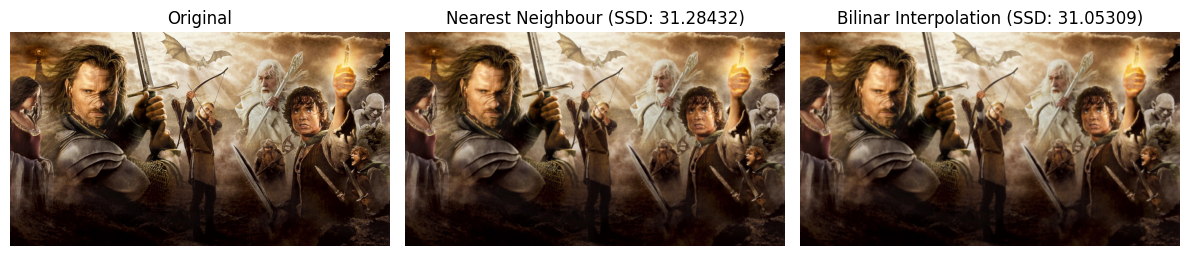

In [43]:
# Create a figure and axes
fig, axs = plt.subplots(1, 3, figsize=(12, 8))

# Plot the first image
axs[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(cv.cvtColor(im1_zoomed_nn, cv.COLOR_BGR2RGB))
axs[1].set_title(f'Nearest Neighbour (SSD: {nn_SSD:.5f})')
axs[1].axis('off')  # Turn off the axis

# Plot the second image
axs[2].imshow(cv.cvtColor(im1_zoomed_bilinear, cv.COLOR_BGR2RGB))
axs[2].set_title(f'Bilinar Interpolation (SSD: {bilinear_SSD:.5f})')
axs[2].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()

### For image 2

In [20]:
# Import images
im2 = cv.imread('a1images/a1q5images/im02.png')
assert im2 is not None
im2_small = cv.imread('a1images/a1q5images/im02small.png')
assert im2_small is not None

In [24]:
im2_zoomed_nn = zoom(im2_small, technique='nn')
im2_zoomed_bilinear = zoom(im2_small, technique='bilinear')

In [29]:
nn_SSD = norm_SSD(im2, im2_zoomed_nn)
bilinear_SSD = norm_SSD(im2, im2_zoomed_bilinear)

print('Normalized SSD for Nearest Neighbour: ', nn_SSD)
print('Normalized SSD for Bilinear: ', bilinear_SSD)

Normalized SSD for Nearest Neighbour:  11.902013310185184
Normalized SSD for Bilinear:  10.682991753472223


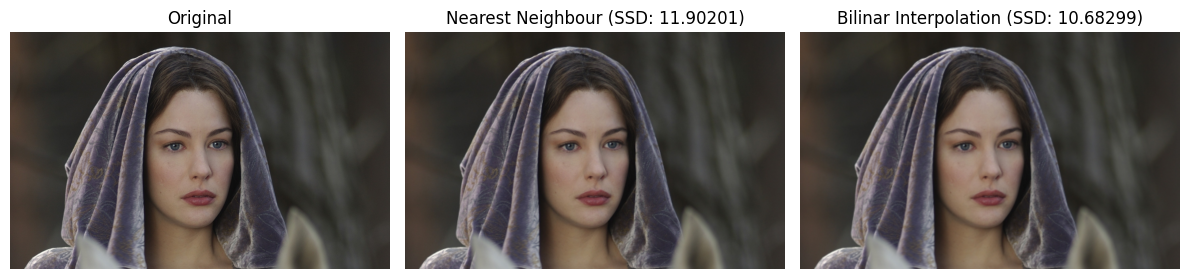

In [30]:
# Create a figure and axes
fig, axs = plt.subplots(1, 3, figsize=(12, 8))

# Plot the first image
axs[0].imshow(cv.cvtColor(im2, cv.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(cv.cvtColor(im2_zoomed_nn, cv.COLOR_BGR2RGB))
axs[1].set_title(f'Nearest Neighbour (SSD: {nn_SSD:.5f})')
axs[1].axis('off')  # Turn off the axis

# Plot the second image
axs[2].imshow(cv.cvtColor(im2_zoomed_bilinear, cv.COLOR_BGR2RGB))
axs[2].set_title(f'Bilinar Interpolation (SSD: {bilinear_SSD:.5f})')
axs[2].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()

### For image 3

In [32]:
# Import images
im3 = cv.imread('a1images/a1q5images/im03.png')
assert im3 is not None
im3_small = cv.imread('a1images/a1q5images/im03small.png')
assert im3_small is not None

In [39]:
im3_zoomed_nn = zoom(im3_small, technique='nn')
im3_zoomed_bilinear = zoom(im3_small, technique='bilinear')
print(im3_zoomed_nn.shape)
print(im3_zoomed_bilinear.shape)
print(im3.shape)

nn_SSD = norm_SSD(im3, im3_zoomed_nn)
bilinear_SSD = norm_SSD(im3, im3_zoomed_bilinear)

print('Normalized SSD for Nearest Neighbour: ', nn_SSD)
print('Normalized SSD for Bilinear: ', bilinear_SSD)

(1460, 2400, 3)
(1460, 2400, 3)
(1459, 2400, 3)


ValueError: Images must have the same dimensions